In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.1/11.0 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np


### Reading Dataset

In [5]:
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Exploration

In [9]:
df.columns #To display the column names in the dataset

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [8]:
df.index #To display index values

RangeIndex(start=0, stop=148, step=1)

In [10]:
df.info() #To print the summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [11]:
df.size #To print the dimension

888

In [13]:
df.shape #No. of rows and columns

(148, 6)

In [16]:
df.dtypes #The datatypes of each column

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [19]:
df.describe() #Statistical analysis of all numerical columns

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


##### Data Exploration is done and the following were observed:
    1. The dimension of the dataset: no.of rows, columns , range of indices were displayed
    2. Statistical analysis was observed which includes mean,minimun value, maximum value, maximum value,Q1,Q2,Q3, standard deviation

### Data Cleaning

#### Removing duplicates

In [34]:
df.duplicated() #Check for duplicate values

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144     True
145    False
146    False
147    False
Length: 148, dtype: bool

In [36]:
df2=df.drop_duplicates()
df2

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


4 duplicate rows removed

#### Removing null values

In [37]:
df2.isnull().sum() #To print the no.of null values in each column

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

The columns "Company","Age","Salary","Place" is having a few null values. For categorical columns we can replace null value with mode. For numerical columns we can use mean if the dataset doesnt have outliers. If the dataset is having outliers we can replace by median

##### Finding mode for columns "Company" and "Place"

In [38]:
df2["Company"].mode()

0    TCS
Name: Company, dtype: object

In [39]:
df2["Place"].mode()

0    Mumbai
Name: Place, dtype: object

##### Replacing null values with mode

In [48]:
df2["Company"]=df2["Company"].fillna("TCS")
df2

C:\Users\karun\AppData\Local\Temp\ipykernel_15892\3069637283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Company"]=df2["Company"].fillna("TCS")


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [49]:
df2["Place"]=df2["Place"].fillna("Mumbai")
df2

C:\Users\karun\AppData\Local\Temp\ipykernel_15892\4278109390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Place"]=df2["Place"].fillna("Mumbai")


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


##### Checking the presence of outliers

In [42]:
df2["Age"].mean()

30.52755905511811

In [43]:
df2["Age"].median()

33.0

In [44]:
df2["Salary"].mean()

5283.471074380165

In [45]:
df2["Salary"].median()

5000.0

The mean and median of both "Age" and "Salary" are almost the same, which means there are no outliers. So we can replace null values with mean

#### Replacing null value with mean

In [50]:
df2["Salary"]=df2["Salary"].fillna(df2["Salary"].mean().round(2))
df2

C:\Users\karun\AppData\Local\Temp\ipykernel_15892\1106439031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Salary"]=df2["Salary"].fillna(df2["Salary"].mean().round(2))


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.47,Chennai,India,0
1,Infosys,30.0,5283.47,Mumbai,India,0
2,TCS,35.0,2300.00,Calcutta,India,0
3,Infosys,40.0,3000.00,Delhi,India,0
4,TCS,23.0,4000.00,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,India,0
143,TCS,33.0,9024.00,Calcutta,India,1
145,Infosys,44.0,4034.00,Delhi,India,1
146,TCS,33.0,5034.00,Mumbai,India,1


In [72]:
df2["Age"]=df2["Age"].fillna(df2["Age"].mean().round(2))
df2

C:\Users\karun\AppData\Local\Temp\ipykernel_15892\3014952998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age"]=df2["Age"].fillna(df2["Age"].mean().round(2))


,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.47,Chennai,0
1,Infosys,30.0,5283.47,Mumbai,0
2,TCS,35.0,2300.00,Calcutta,0
3,Infosys,40.0,3000.00,Delhi,0
4,TCS,23.0,4000.00,Mumbai,0
...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,0
143,TCS,33.0,9024.00,Calcutta,1
145,Infosys,44.0,4034.00,Delhi,1
146,TCS,33.0,5034.00,Mumbai,1


In [73]:
df2.isnull().sum() #re-checking if null values are replaced

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [58]:
df2["Place"].unique() #Checking unique values in each column

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [69]:
df2.replace("Podicherry","Pondicherry",inplace=True) #Correcting a spelling mistake and replacing with the new value

C:\Users\karun\AppData\Local\Temp\ipykernel_15892\356081147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace("Podicherry","Pondicherry",inplace=True) #Correcting a spelling mistake and replacing with the new value


In [60]:
df2["Salary"].unique()

array([5283.47, 2300.  , 3000.  , 4000.  , 5000.  , 6000.  , 7000.  ,
       8000.  , 9000.  , 1089.  , 1234.  , 3030.  , 3045.  , 3184.  ,
       4824.  , 5835.  , 7084.  , 8943.  , 8345.  , 9284.  , 9876.  ,
       2034.  , 7654.  , 2934.  , 4034.  , 5034.  , 8202.  , 9024.  ,
       4345.  , 6544.  , 6543.  , 3234.  , 4324.  , 5435.  , 5555.  ,
       8787.  , 3454.  , 5654.  , 5009.  , 5098.  , 3033.  ])

In [59]:
df2["Age"].unique()

array([20.  , 30.  , 35.  , 40.  , 23.  , 30.53, 34.  , 45.  , 18.  ,
       22.  , 32.  , 37.  , 50.  , 21.  , 46.  , 36.  , 26.  , 41.  ,
       24.  , 25.  , 43.  , 19.  , 38.  , 51.  , 31.  , 44.  , 33.  ,
       17.  ,  0.  , 54.  ])

In [1]:
df2["Age"].replace(0,np.nan) # replace 0 with null

NameError: name 'df2' is not defined

In [61]:
df2["Gender"].unique()

array([0, 1], dtype=int64)

In [62]:
df2["Company"].unique()

array(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'], dtype=object)

In [63]:
df2["Country"].unique()

array(['India'], dtype=object)

Since the column "Country" has only one distinct value, it is less likely to have a significant impact in ML process. So dropping the column "Country"

In [70]:
df2.drop(columns="Country",inplace=True)
df2

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.47,Chennai,0
1,Infosys,30.0,5283.47,Mumbai,0
2,TCS,35.0,2300.00,Calcutta,0
3,Infosys,40.0,3000.00,Delhi,0
4,TCS,23.0,4000.00,Mumbai,0
...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,0
143,TCS,33.0,9024.00,Calcutta,1
145,Infosys,44.0,4034.00,Delhi,1
146,TCS,33.0,5034.00,Mumbai,1


##### Data cleaning is done and the following changes were made:
    1. Removed duplicate rows
    2. Removed a column with only one unique value
    3. Corrected a spelling mistake in a data
    4. Replaced null values with mean and mode
    5. Checked the presence of outliers
    6. Replaced 0 in "Age" with NaN

### Data Analysis

In [74]:
df2

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.47,Chennai,0
1,Infosys,30.0,5283.47,Mumbai,0
2,TCS,35.0,2300.00,Calcutta,0
3,Infosys,40.0,3000.00,Delhi,0
4,TCS,23.0,4000.00,Mumbai,0
...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,0
143,TCS,33.0,9024.00,Calcutta,1
145,Infosys,44.0,4034.00,Delhi,1
146,TCS,33.0,5034.00,Mumbai,1


#### Filter the data with age >40 and salary<5000


In [77]:
df3=df2[(df2["Age"]>40) & (df2["Salary"]<5000)]
df3

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


#### Plot the chart with age and salary

In [106]:
df5= df3.drop(["Company","Place","Gender"], axis=1)
df5

,Age,Salary
21,50.0,3184.0
32,45.0,4034.0
39,41.0,3000.0
50,41.0,3000.0
57,51.0,3184.0
68,43.0,4034.0
75,44.0,3000.0
86,41.0,3000.0
93,54.0,3184.0
104,44.0,4034.0


In [107]:
df5.corr()

,Age,Salary
Age,1.000000,-0.111893
Salary,-0.111893,1.000000


<Axes: >

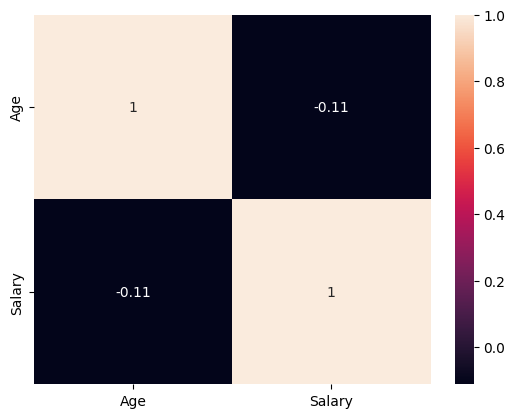

In [110]:
import seaborn as sns
sns.heatmap(df5.corr(),annot=True)

#### Count the number of people from each place and represent it visually

In [151]:
count=df2["Place"].value_counts()
df8=pd.DataFrame({"Place":count.index,"No_of_ppl":count.values})
df8

,Place,No_of_ppl
0,Mumbai,48
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Pondicherry,3
8,Pune,2
9,Bhopal,1


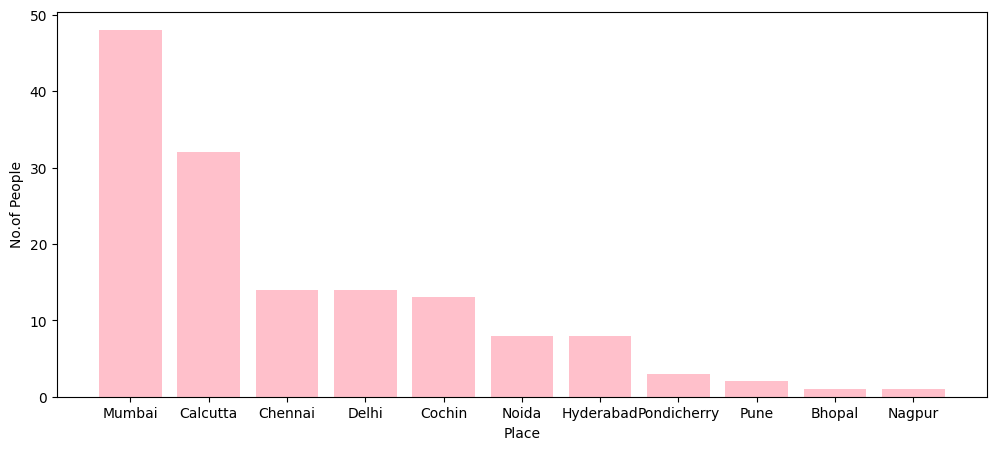

In [161]:
plt.figure(figsize=(12,5))
plt.bar(df8["Place"],df8["No_of_ppl"],color="pink")
plt.xlabel("Place")
plt.ylabel("No.of People")
plt.show()

#### Data Encoding

In [165]:
import numpy as np
df_one_hot_encoded = pd.get_dummies(data = df2, columns = ["Company","Place"])
df_one_hot_encoded 

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Pondicherry,Place_Pune
0,20.0,5283.47,0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.47,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.00,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.00,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.00,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.00,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.00,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.00,1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.00,1,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


##### Data Encoding of categorical values is done using one-hot encoding

#### Feature Scaling

#### Standard Scaler

In [167]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_one_hot_encoded )
scaled_data = scaler.transform(df_one_hot_encoded )
scaled_data

array([[-1.01259817e+00, -3.82514739e-07, -5.34522484e-01, ...,
        -2.42535625e-01, -1.45864991e-01, -1.18678166e-01],
       [-5.07698412e-02, -3.82514739e-07, -5.34522484e-01, ...,
        -2.42535625e-01, -1.45864991e-01, -1.18678166e-01],
       [ 4.30144324e-01, -1.26412238e+00, -5.34522484e-01, ...,
        -2.42535625e-01, -1.45864991e-01, -1.18678166e-01],
       ...,
       [ 1.29578982e+00, -5.29411609e-01,  1.87082869e+00, ...,
        -2.42535625e-01, -1.45864991e-01, -1.18678166e-01],
       [ 2.37778658e-01, -1.05702975e-01,  1.87082869e+00, ...,
        -2.42535625e-01, -1.45864991e-01, -1.18678166e-01],
       [-8.20232505e-01,  1.23660598e+00, -5.34522484e-01, ...,
        -2.42535625e-01, -1.45864991e-01, -1.18678166e-01]])

#### MinMax Scaler

In [168]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_one_hot_encoded)
scaled_data = scaler.transform(df_one_hot_encoded)
scaled_data

array([[0.37037037, 0.47734949, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.47734949, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64814815, 0.13781723, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.81481481, 0.33515421, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61111111, 0.44895869, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40740741, 0.80949129, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Standard scaler and minmax scaler is applied on the encoded dataframe and above mentioned are the results obtained